In [8]:
import numpy as np
import pypolycontain as pp

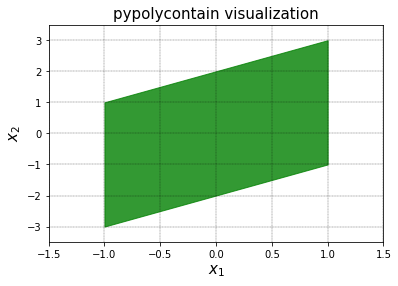

In [9]:
q_o,n=5,2
Z_o=pp.zonotope(x=np.zeros((n,1)),G=np.random.random((n,q_o))-0.5)
Z_o.G=np.array([[1,0],[1,2]])
pp.visualize([Z_o])

In [10]:
# Z_i=pp.zonotope(x=np.zeros((n,1)),G=G)
import pydrake.solvers.mathematicalprogram as MP
# use SOCS solver
import pydrake.solvers.scs as SCS
mysolver=SCS.ScsSolver()

success


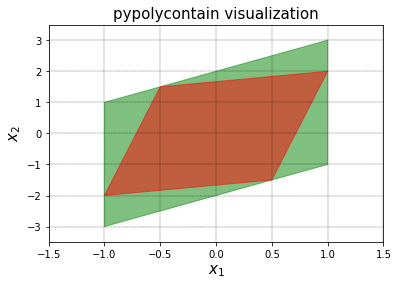

In [11]:
program=MP.MathematicalProgram()
G=program.NewSymmetricContinuousVariables(n,'G') 
program.AddPositiveSemidefiniteConstraint(G)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G)
Z_i=pp.zonotope(x=np.zeros((n,1)),G=G) 
pp.subset(program,Z_i,Z_o)
result=mysolver.Solve(program,None,None)
if result.is_success():
    print("success")
    G_n= result.GetSolution(G)
else:
    print("not succesfull") 
Z_i_n=pp.zonotope(x=np.zeros((n,1)),G=G_n,color='red')
pp.visualize([Z_o,Z_i_n],alpha=0.5)

success


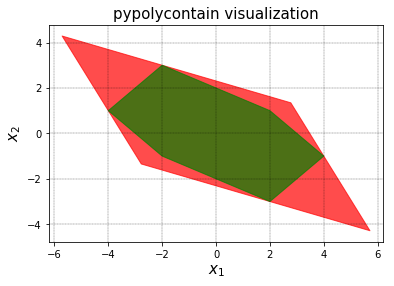

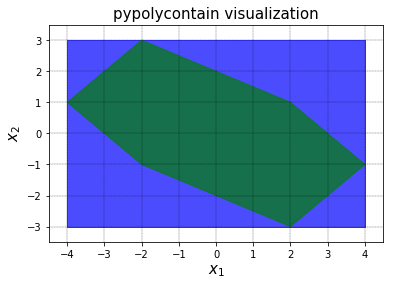

In [108]:
Z_i=pp.zonotope(x=np.zeros((n,1)),G=np.random.random((n,q_o))-0.5)
Z_i.G=np.array([[1,1,-2],[-1,1,1]])
program=MP.MathematicalProgram()
G=program.NewSymmetricContinuousVariables(n,'G') 
program.AddPositiveSemidefiniteConstraint(G)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G)
Z_o=pp.zonotope(x=np.zeros((n,1)),G=np.eye(2)) 
Z_i_a=pp.zonotope(x=Z_i.x,G=np.dot(G,Z_i.G))
pp.subset(program,Z_i_a,Z_o)
result=mysolver.Solve(program,None,None)
if result.is_success():
    print("success")
    G_n= result.GetSolution(G)
else:
    print("not succesfull")
Z_o_n=pp.zonotope(x=np.zeros((n,1)),G=np.linalg.inv(G_n),color='red')
pp.visualize([Z_o_n,Z_i],alpha=0.7)

def intervall_hull(G):
    D=np.linalg.norm(G,1, axis=1)
    return np.diag(D)

def Girard(G,number_of_columns_wanted):
    """
    The idea is based on Girard, HSCC 2006
    """
    q_i,q_f,n=G.shape[1],number_of_columns_wanted,G.shape[0]
    gamma=np.linalg.norm(G,1, axis=0)-np.linalg.norm(G,np.inf, axis=0)
    G_sorted=G[:,np.argsort(gamma)]
    assert q_f>=n
    L=G_sorted[:,:q_i-q_f+n]
    K=G_sorted[:,q_i-q_f+n:]
    L_R=intervall_hull(L)
    return np.hstack((L_R,K))
Z_o_girard=pp.zonotope(x=np.zeros((n,1)),G=Girard(Z_i.G,2),color='blue')
pp.visualize([Z_o_girard,Z_i],alpha=0.7)

success


5.674344909311485

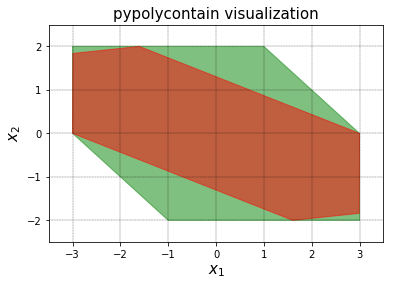

In [136]:
Z_o=pp.zonotope(x=np.zeros((n,1)),G=np.random.random((n,q_o))-0.5)
Z_o.G=np.array([[2,0,1],[0,1,-1]])
program=MP.MathematicalProgram()
G1=program.NewSymmetricContinuousVariables(n,'G1') 
program.AddPositiveSemidefiniteConstraint(G1)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G1)
G2=program.NewSymmetricContinuousVariables(n,'G2') 
program.AddPositiveSemidefiniteConstraint(G2)
program.AddMaximizeLogDeterminantSymmetricMatrixCost(G2)
program.AddLinearConstraint(np.equal(G1[:,1],G2[:,0],dtype='object').flatten())
G_s=np.hstack(( G1[:,0:1] , G1[:,1:2] , G2[:,1:2] ))
K=np.random.random((2,2))-0.5
Z_i=pp.zonotope(x=np.zeros((n,1)),G=np.dot(K,G_s)) 
pp.subset(program,Z_i,Z_o)
result=mysolver.Solve(program,None,None)
if result.is_success():
    print("success")
    G1_n= result.GetSolution(G1)
    G2_n= result.GetSolution(G2)
else:
    print("not succesfull")
G_s_n=np.hstack(( G1_n[:,0:1] , G1_n[:,1:2] , G2_n[:,1:2] ))
Z_i_n=pp.zonotope(x=np.zeros((n,1)),G=np.dot(K,G_s_n),color='red')
pp.visualize([Z_o,Z_i_n],alpha=0.5)
np.linalg.det(np.dot(Z_i_n.G,Z_i_n.G.T))

In [124]:
Z_i_n.G

array([[ 0.2537153 ,  0.10648343,  0.27341061],
       [-0.88274827, -0.33100427, -0.78625781]])